In [1719]:
!pip install pandas

In [1720]:
!pip install seaborn
!pip install configparser
!pip install matplotlib

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from configparser import ConfigParser
import numpy as np


In [184]:
SIZE_MODEL = 444584
METHOD = "r_robin"

In [205]:
tests = [
    'POC 25 ic:0.25 sel:deev expl:0.25',
    'POC 50 ic:0.25 sel:deev expl:0.50',
    'AVG 25 ic:0.25 sel:deev expl:0.25',
    'AVG 50 ic:0.25 sel:deev expl:0.50',
    'DEEV ic:0.25 sel:default expl:0.50',
    'FedCIA ic:0.25 sel:deev expl:0.0',
    'FedCIA ic:0.25 sel:deev expl:0.33',
    'FedCIA ic:0.25 sel:deev expl:0.66',
    'FedCIA ic:0.25 sel:deev expl:1.0',
    'FedCIA ic:0.25 sel:random expl:0.0',
    'FedCIA ic:0.25 sel:random expl:0.33',
    'FedCIA ic:0.25 sel:random expl:0.66',
    'FedCIA ic:0.25 sel:random expl:1.0',
    'FedCIA ic:0.25 sel:r_robin expl:0.0',
    'FedCIA ic:0.25 sel:r_robin expl:0.33',
    'FedCIA ic:0.25 sel:r_robin expl:0.66',
    'FedCIA ic:0.25 sel:r_robin expl:1.0',
    'POC 25 ic:0.50 sel:deev expl:0.25',
    'POC 50 ic:0.50 sel:deev expl:0.50',
    'AVG 25 ic:0.50 sel:deev expl:0.25',
    'AVG 50 ic:0.50 sel:deev expl:0.50',
    'DEEV ic:0.50 sel:default expl:0.50',
    'FedCIA ic:0.50 sel:deev expl:0.0',
    'FedCIA ic:0.50 sel:deev expl:0.33',
    'FedCIA ic:0.50 sel:deev expl:0.66',
    'FedCIA ic:0.50 sel:deev expl:1.0',
    'FedCIA ic:0.50 sel:random expl:0.0',
    'FedCIA ic:0.50 sel:random expl:0.33',
    'FedCIA ic:0.50 sel:random expl:0.66',
    'FedCIA ic:0.50 sel:random expl:1.0',
    'FedCIA ic:0.50 sel:r_robin expl:0.0',
    'FedCIA ic:0.50 sel:r_robin expl:0.33',
    'FedCIA ic:0.50 sel:r_robin expl:0.66',
    'FedCIA ic:0.50 sel:r_robin expl:1.0',
    'POC 25 ic:0.75 sel:deev expl:0.25',
    'POC 50 ic:0.75 sel:deev expl:0.50',
    'AVG 25 ic:0.75 sel:deev expl:0.25',
    'AVG 50 ic:0.75 sel:deev expl:0.50',
    'DEEV ic:0.75 sel:default expl:0.50',
    'FedCIA ic:0.75 sel:deev expl:0.0',
    'FedCIA ic:0.75 sel:deev expl:0.33',
    'FedCIA ic:0.75 sel:deev expl:0.66',
    'FedCIA ic:0.75 sel:deev expl:1.0',
    'FedCIA ic:0.75 sel:random expl:0.0',
    'FedCIA ic:0.75 sel:random expl:0.33',
    'FedCIA ic:0.75 sel:random expl:0.66',
    'FedCIA ic:0.75 sel:random expl:1.0',
    'FedCIA ic:0.75 sel:r_robin expl:0.0',
    'FedCIA ic:0.75 sel:r_robin expl:0.33',
    'FedCIA ic:0.75 sel:r_robin expl:0.66',
    'FedCIA ic:0.75 sel:r_robin expl:1.0',
]

labels = {
    'FedCIA teste 1': 'CIA - deev - ic: 0.25 - expl: 0.0',
    'FedCIA teste 4': 'CIA - deev - ic: 0.25 - expl: 0.33',
    'FedCIA teste 7': 'CIA - deev - ic: 0.25 - expl: 0.66',
    'FedCIA teste 10': 'CIA - deev - ic: 0.25 - expl: 1.0',
    'FedCIA teste 13': 'CIA - random - ic: 0.25 - expl: 0.0',
    'FedCIA teste 16': 'CIA - random - ic: 0.25 - expl: 0.33',
    'FedCIA teste 19': 'CIA - random - ic: 0.25 - expl: 0.66',
    'FedCIA teste 22': 'CIA - random - ic: 0.25 - expl: 1.0',
    'FedCIA teste 25': 'CIA - r_robin - ic: 0.25 - expl: 0.0',
    'FedCIA teste 28': 'CIA - r_robin - ic: 0.25 - expl: 0.33',
    'FedCIA teste 31': 'CIA - r_robin - ic: 0.25 - expl: 0.66',
    'FedCIA teste 34': 'CIA - r_robin - ic: 0.25 - expl: 1.0',
    'FedCIA teste 2': 'CIA - deev - ic: 0.50 - expl: 0.0',
    'FedCIA teste 5': 'CIA - deev - ic: 0.50 - expl: 0.33',
    'FedCIA teste 8': 'CIA - deev - ic: 0.50 - expl: 0.66',
    'FedCIA teste 11': 'CIA - deev - ic: 0.50 - expl: 1.0',
    'FedCIA teste 14': 'CIA - random - ic: 0.50 - expl: 0.0',
    'FedCIA teste 17': 'CIA - random - ic: 0.50 - expl: 0.33',
    'FedCIA teste 20': 'CIA - random - ic: 0.50 - expl: 0.66',
    'FedCIA teste 23': 'CIA - random - ic: 0.50 - expl: 1.0',
    'FedCIA teste 26': 'CIA - r_robin - ic: 0.50 - expl: 0.0',
    'FedCIA teste 29': 'CIA - r_robin - ic: 0.50 - expl: 0.33',
    'FedCIA teste 32': 'CIA - r_robin - ic: 0.50 - expl: 0.66',
    'FedCIA teste 35': 'CIA - r_robin - ic: 0.50 - expl: 1.0',
    'FedCIA teste 3': 'CIA - deev - ic: 0.75 - expl: 0.0',
    'FedCIA teste 6': 'CIA - deev - ic: 0.75 - expl: 0.33',
    'FedCIA teste 9': 'CIA - deev - ic: 0.75 - expl: 0.66',
    'FedCIA teste 12': 'CIA - deev - ic: 0.75 - expl: 1.0',
    'FedCIA teste 15': 'CIA - random - ic: 0.75 - expl: 0.0',
    'FedCIA teste 18': 'CIA - random - ic: 0.75 - expl: 0.33',
    'FedCIA teste 21': 'CIA - random - ic: 0.75 - expl: 0.66',
    'FedCIA teste 24': 'CIA - random - ic: 0.75 - expl: 1.0',
    'FedCIA teste 27': 'CIA - r_robin - ic: 0.75 - expl: 0.0',
    'FedCIA teste 30': 'CIA - r_robin - ic: 0.75 - expl: 0.33',
    'FedCIA teste 33': 'CIA - r_robin - ic: 0.75 - expl: 0.66',
    'FedCIA teste 36': 'CIA - r_robin - ic: 0.75 - expl: 1.0',
}

In [264]:
#round,cid,solution,method,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,g_fit_loss,l_fit_acc,l_fit_loss,dynamic_engagement,old_dynamic_engagement,is_selected,desire,size,cost,willing,r_intention,miss,epoch,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold
client_data = pd.read_csv('logs/c-data.csv')
# client_data.head()
# a = ['POC 25 ic:0.50 sel:deev expl:0.25', 'AVG 25 ic:0.50 sel:deev expl:0.25', 'POC 50 ic:0.25 sel:deev expl:0.50', 'DEEV ic:0.25 sel:default expl:0.50', 'DEEV ic:0.50 sel:default expl:0.50', 'DEEV ic:0.75 sel:default expl:0.50']
# client_data = client_data.loc[~client_data['config_test'].isin(a)]

In [265]:
server_data = pd.read_csv('logs/s-data.csv')
server_data['selection'] = server_data['selection'].apply(
    lambda x: [
        (cid, desired)
        for cid, desired in 
        [b.split(':') for b in x.split('|')]
    ]
)
server_data.loc[server_data['exploration'] == 0].head()


,rounds,strategy,model_type,select_client_method,n_selected,n_engaged,n_not_engaged,selection,r_intetion,r_robin,...,local_epochs,dirichlet_alpha,non_iid,dataset,exploitation,exploration,decay,threshold,init_clients,config_test


In [266]:
literature_solutions = [
    'POC 33 ic:0.25 sel:deev expl:0.33',
    'POC 66 ic:0.25 sel:deev expl:0.66',
    'POC 33 ic:0.50 sel:deev expl:0.33',
    'POC 66 ic:0.50 sel:deev expl:0.66',
    'POC 33 ic:0.75 sel:deev expl:0.33',
    'POC 66 ic:0.75 sel:deev expl:0.66',
    'AVG 33 ic:0.25 sel:deev expl:0.33',
    'AVG 25 ic:0.75 sel:deev expl:0.33',
    'AVG 66 ic:0.25 sel:deev expl:0.66',
    'AVG 33 ic:0.50 sel:deev expl:0.33',
    'AVG 66 ic:0.50 sel:deev expl:0.66',
    'AVG 33 ic:0.75 sel:deev expl:0.33',
    'AVG 66 ic:0.75 sel:deev expl:0.66',
    'DEEV ic:0.25 sel:default expl:0.50',
    'DEEV ic:0.50 sel:default expl:0.50',
    'DEEV ic:0.75 sel:default expl:0.50',
    'AVG 25 ic:0.25 sel:deev expl:0.33',
    'AVG 66 ic:0.25 sel:deev expl:0.66',
    'AVG 25 ic:0.50 sel:deev expl:0.33',
    'AVG 66 ic:0.50 sel:deev expl:0.66',
    'AVG 25 ic:0.75 sel:deev expl:0.33',
    'AVG 66 ic:0.75 sel:deev expl:0.66',
]

In [230]:
data_literature = client_data.loc[client_data['config_test'].isin(literature_solutions)].copy()
filter_list = [
    'FedCIA TESTE rafael random',
    'FedCIA TESTE rafael deev',
    'FedCIA TESTE rafael r_robin',
]
client_data = client_data.loc[(client_data['config_test'].isin(filter_list))]
data = client_data.drop(client_data.loc[client_data['config_test'].isin(literature_solutions)].index, axis=0)


In [231]:
data_literature.loc[data_literature['init_clients'] == 0.25]['config_test'].unique()

array(['DEEV ic:0.25 sel:default expl:0.50',
       'POC 33 ic:0.25 sel:deev expl:0.33',
       'AVG 25 ic:0.25 sel:deev expl:0.33',
       'POC 66 ic:0.25 sel:deev expl:0.66',
       'AVG 66 ic:0.25 sel:deev expl:0.66'], dtype=object)

In [211]:
client_data.tail(2)

,rounds,cid,strategy,select_client_method,model_type,g_eval_acc,g_eval_loss,l_eval_acc,l_eval_loss,g_fit_acc,...,dirichlet_alpha,non_iid,dataset,exploitation,exploration,least_select_factor,decay,threshold,init_clients,config_test
270048,100,11,cia,default,dnn,0.925,0.289628,0.305,55.364662,0.982308,...,0.1,True,mnist,0.0,0.1,0.0,0.005,1.0,0.25,FedCIA TESTE rafael deev
270049,100,3,cia,default,dnn,0.945,0.194916,0.340,57.456688,0.959711,...,0.1,True,mnist,0.0,0.1,0.0,0.005,1.0,0.25,FedCIA TESTE rafael deev


In [261]:

def plot(df_list, ax, ic):
    # markers=["o", "X", "v", "s", "P", "D"]
    for j, df in enumerate(df_list):
        # a = pd.concat([data_literature.loc[data_literature['init_clients'] == ic], df.loc[df['select_client_method'] == METHOD]])
        a = pd.concat([data_literature.loc[data_literature['init_clients'] == ic], df])
        for i, (group_name, group_data) in enumerate(a.groupby('config_test')):
            label = group_name
            line_style = '-'
            if "AVG 66" in group_name:
                label = "Random k=66%"
                color = 'red'
            elif "AVG 33" in group_name or "AVG 25" in group_name:
                label = "Random k=33%"
                line_style = '--'
                color = 'red'
            elif "POC 66" in group_name:
                color = 'blue'
                label = "POC k=66%"
            elif "POC 33" in group_name:
                color = 'blue'
                line_style = '--'
                label = "POC k=33%"
            elif "FedCIA" in group_name:
                label="FedCIA"
                color = 'green'
            elif 'DEEV' in group_name:
                label = "DEEV"
                color='brown'
            sns.lineplot(
                markersize=10,
                markevery=10,
                color=color,
                linestyle=line_style,
                label=label,
                # marker=markers[i],
                ax=ax[j],
                x='rounds',
                y='g_eval_acc',
                data=group_data,
                errorbar=('ci', False)
            )
        # ax[0].legend(bbox_to_anchor=(0.0, 0.1, 1.05, 1.3), ncol=4)
        ax[j].get_legend().remove()
        ax[j].grid(True)
        ax[j].set_xlabel("Rounds")
        ax[j].set_ylabel("Acuracy")
    # sns.lineplot(ax=ax[1], x='rounds', y='g_eval_acc', data=pd.concat([data_literature.loc[data_literature['init_clients'] == ic], df_list[1].loc[df_list[1]['select_client_method'] == METHOD]]), hue='config_test', errorbar=('ci', False), palette='inferno')
    # # ax[1].legend(bbox_to_anchor=(0.0, 0.1, 1.05, 1.3))
    # ax[1].get_legend().remove()
    # ax[1].grid(True)
    # sns.lineplot(ax=ax[2], x='rounds', y='g_eval_acc', data=pd.concat([data_literature.loc[data_literature['init_clients'] == ic], df_list[2].loc[df_list[2]['select_client_method'] == METHOD]]), hue='config_test', errorbar=('ci', False), palette='inferno')
    # # ax[2].legend(bbox_to_anchor=(0.0, 0.1, 1.05, 1.3))
    # ax[2].get_legend().remove()
    # ax[2].grid(True)
    # sns.lineplot(ax=ax[3], x='rounds', y='g_eval_acc', data=pd.concat([data_literature.loc[data_literature['init_clients'] == ic], df_list[3].loc[df_list[3]['select_client_method'] == METHOD]]), hue='config_test', errorbar=('ci', False), palette='inferno')
    # # ax[3].legend(bbox_to_anchor=(0.0, 0.1, 1.05, 1.3))
    # ax[3].get_legend().remove()
    # ax[3].grid(True)


def plot_bw(df_list, ax, ic, literature):
    sns.barplot(ax=ax[0], estimator='sum',y='is_selected', data=pd.concat([literature.loc[literature['init_clients'] == ic],df_list[0]]), hue='config_test', errorbar=('ci', False), palette='inferno')
    # sns.barplot(ax=ax[1], estimator='sum',y='is_selected', data=pd.concat([literature.loc[literature['init_clients'] == ic],df_list[1]]), hue='config_test', errorbar=('ci', False), palette='inferno')
    # sns.barplot(ax=ax[2], estimator='sum',y='is_selected', data=pd.concat([literature.loc[literature['init_clients'] == ic],df_list[2]]), hue='config_test', errorbar=('ci', False), palette='inferno')
    # sns.barplot(ax=ax[3], estimator='sum',y='is_selected', data=pd.concat([literature.loc[literature['init_clients'] == ic],df_list[3]]), hue='config_test', errorbar=('ci', False), palette='inferno')
    ax[0].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.4))
    # ax[1].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.4))
    # ax[2].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.4))
    # ax[3].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.4))


def plot_only_cia(df_list, ax):
    for j, df in enumerate(df_list):
        for i, (group_name, group_data) in enumerate(df.groupby('config_test')):
            label = group_name
            if 'deev' in group_name:
                label = "FedCIA DEEV"
            elif 'random' in group_name:
                label = "FedCIA Random"
            else:
                label="FedCIA Round Robin"
            sns.lineplot(
                markersize=10,
                markevery=10,
                label=label,
                # marker=markers[i],
                ax=ax[j],
                x='rounds',
                y='g_eval_acc',
                data=group_data,
                errorbar=('ci', False)
            )
        ax[j].get_legend().remove()
        ax[j].set_ylim(0,1)
        ax[j].grid(True)
        ax[j].set_ylabel("Accuracy")
        ax[j].set_xlabel("Rounds")
        
    # sns.lineplot(ax=ax[0], x='rounds', y='g_eval_acc', data=df_list[0], hue='config_test', errorbar=('ci', False), palette='inferno')
    # ax[0].legend(bbox_to_anchor=(0.0, 0.1, 1.05, 1.1))
    # sns.lineplot(ax=ax[1], x='rounds', y='g_eval_acc', data=df_list[1], hue='config_test', errorbar=('ci', False), palette='inferno')
    # ax[1].legend(bbox_to_anchor=(0.0, 0.1, 1.05, 1.1))
    # sns.lineplot(ax=ax[2], x='rounds', y='g_eval_acc', data=df_list[2], hue='config_test', errorbar=('ci', False), palette='inferno')
    # ax[2].legend(bbox_to_anchor=(0.0, 0.1, 1.05, 1.1))
    # sns.lineplot(ax=ax[3], x='rounds', y='g_eval_acc', data=df_list[3], hue='config_test', errorbar=('ci', False), palette='inferno')
    # ax[3].legend(bbox_to_anchor=(0.0, 0.1, 1.05, 1.1))


def plot_bw_only_cia(df_list, ax):
    sns.barplot(ax=ax[0], y='is_selected', data=df_list[0], hue='config_test', errorbar=('ci', False), palette='inferno')
    sns.barplot(ax=ax[1], y='is_selected', data=df_list[1], hue='config_test', errorbar=('ci', False), palette='inferno')
    sns.barplot(ax=ax[2], y='is_selected', data=df_list[2], hue='config_test', errorbar=('ci', False), palette='inferno')
    sns.barplot(ax=ax[3], y='is_selected', data=df_list[3], hue='config_test', errorbar=('ci', False), palette='inferno')
    ax[0].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.15))
    ax[1].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.15))
    ax[2].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.15))
    ax[3].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.15))


## LINE PLOT

In [262]:
# Interested Clients 0.25
data_0_25 = data.loc[data['init_clients'] == 0.25]
# df_0_25_0_0 = data_0_25.loc[data_0_25['exploration'] == 0.1]
# df_0_25_0_33 = data_0_25.loc[data_0_25['exploration'] == 0.33]
# df_0_25_0_66 = data_0_25.loc[data_0_25['exploration'] == 0.66]
# df_0_25_1_00 = data_0_25.loc[data_0_25['exploration'] == 1.00]
data_0_25['config_test'].unique()

array(['FedCIA TESTE rafael random', 'FedCIA TESTE rafael r_robin',
       'FedCIA TESTE rafael deev'], dtype=object)

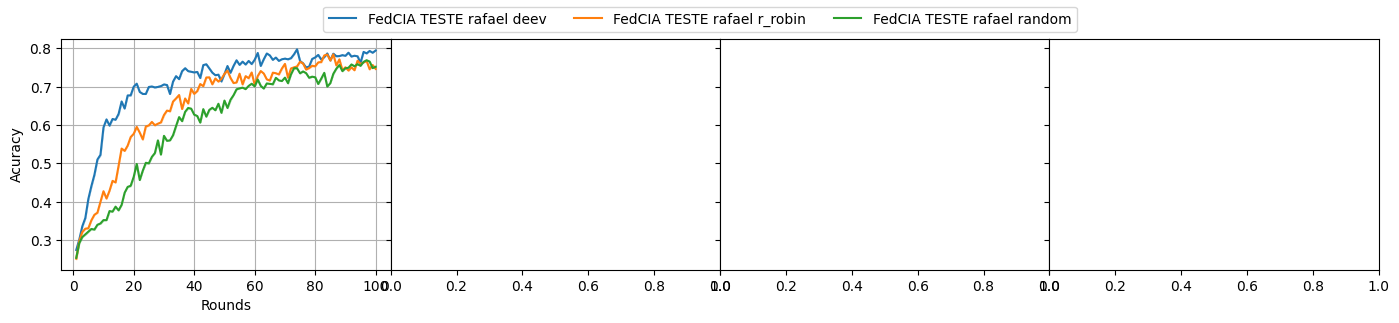

In [263]:
fig_0_25, ax_0_25 = plt.subplots(1,4, figsize=(17,3), sharey=True)
# plot([df_0_25_0_0, df_0_25_0_33, df_0_25_0_66, df_0_25_1_00], ax_0_25, 0.25)
plot([data_0_25], ax_0_25, 0.1)
fig_0_25.savefig('0.25.png', format='png', dpi=300)
fig_0_25.subplots_adjust(hspace=0, wspace=0)
handles, labels = ax_0_25[0].get_legend_handles_labels()
fig_0_25.legend(handles, labels, loc='upper center', ncol=6)
# fig_0_25.tight_layout()
fig_0_25.show()


In [80]:
# Interested clients 0.5
data_0_50 = data.loc[data['init_clients'] == 0.50]
df_0_50_0_0 = data_0_50.loc[data_0_50['exploration'] == 0.00]
df_0_50_0_33 = data_0_50.loc[data_0_50['exploration'] == 0.33]
df_0_50_0_66 = data_0_50.loc[data_0_50['exploration'] == 0.66]
df_0_50_1_00 = data_0_50.loc[data_0_50['exploration'] == 1.00]


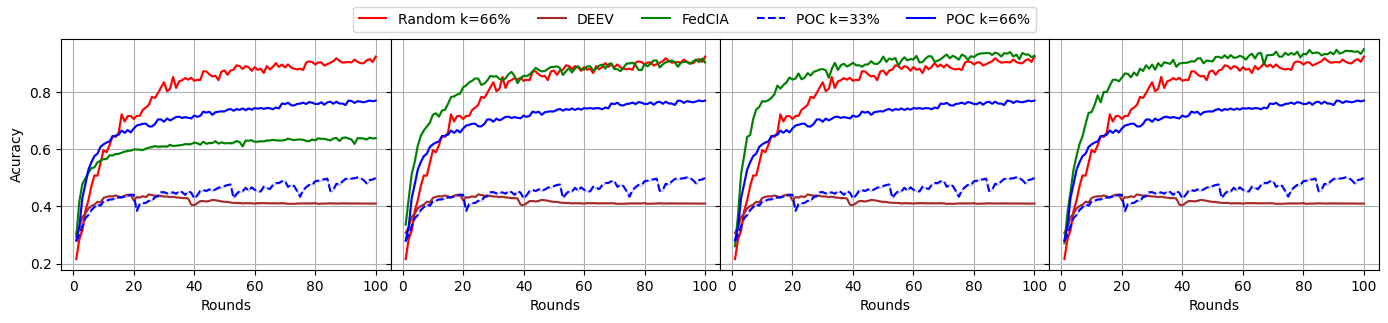

In [81]:
fig_0_50, ax_0_50 = plt.subplots(1,4, figsize=(17,3), sharey=True)
plot([df_0_50_0_0, df_0_50_0_33, df_0_50_0_66, df_0_50_1_00], ax_0_50, 0.50)
fig_0_50.savefig('0.50.png', format='png', dpi=300)
fig_0_50.subplots_adjust(hspace=0, wspace=0)
handles, labels = ax_0_50[0].get_legend_handles_labels()
fig_0_50.legend(handles, labels, loc='upper center', ncol=6)
# fig_0_50.tight_layout()
fig_0_50.show()


In [82]:
# Interested clients 0.75
data_0_75 = data.loc[data['init_clients'] == 0.75]
df_0_75_0_0 = data_0_75.loc[data_0_75['exploration'] == 0.00]
df_0_75_0_33 = data_0_75.loc[data_0_75['exploration'] == 0.33]
df_0_75_0_66 = data_0_75.loc[data_0_75['exploration'] == 0.66]
df_0_75_1_00 = data_0_75.loc[data_0_75['exploration'] == 1.00]

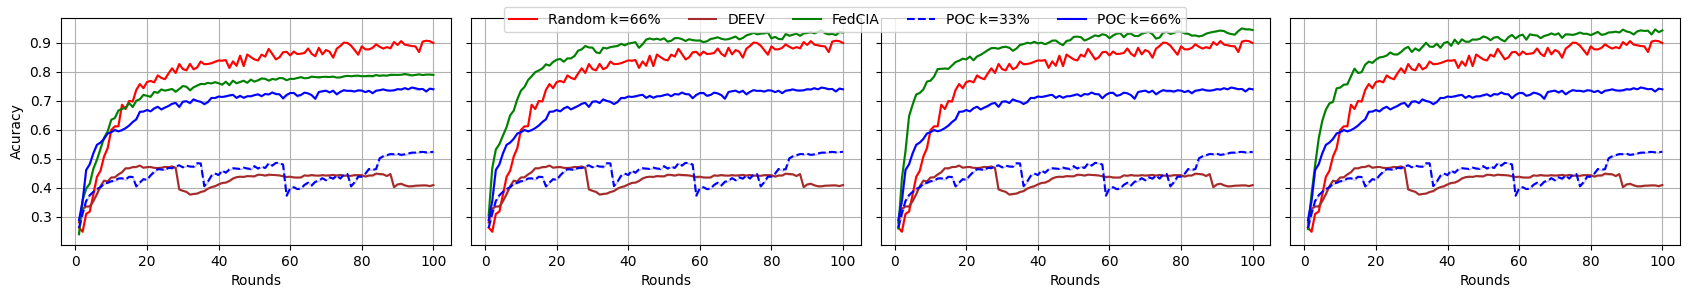

In [83]:
fig_0_75, ax_0_75 = plt.subplots(1,4, figsize=(17,3), sharey=True)
plot([df_0_75_0_0, df_0_75_0_33, df_0_75_0_66, df_0_75_1_00], ax_0_75, 0.75)
fig_0_75.savefig('0.75.png', format='png', dpi=300)
fig_0_75.subplots_adjust(hspace=0, wspace = 0)
handles, labels = ax_0_75[0].get_legend_handles_labels()
fig_0_75.legend(handles, labels, loc='upper center', ncol = 6)
fig_0_75.tight_layout()
fig_0_75.show()

## CONVENCING

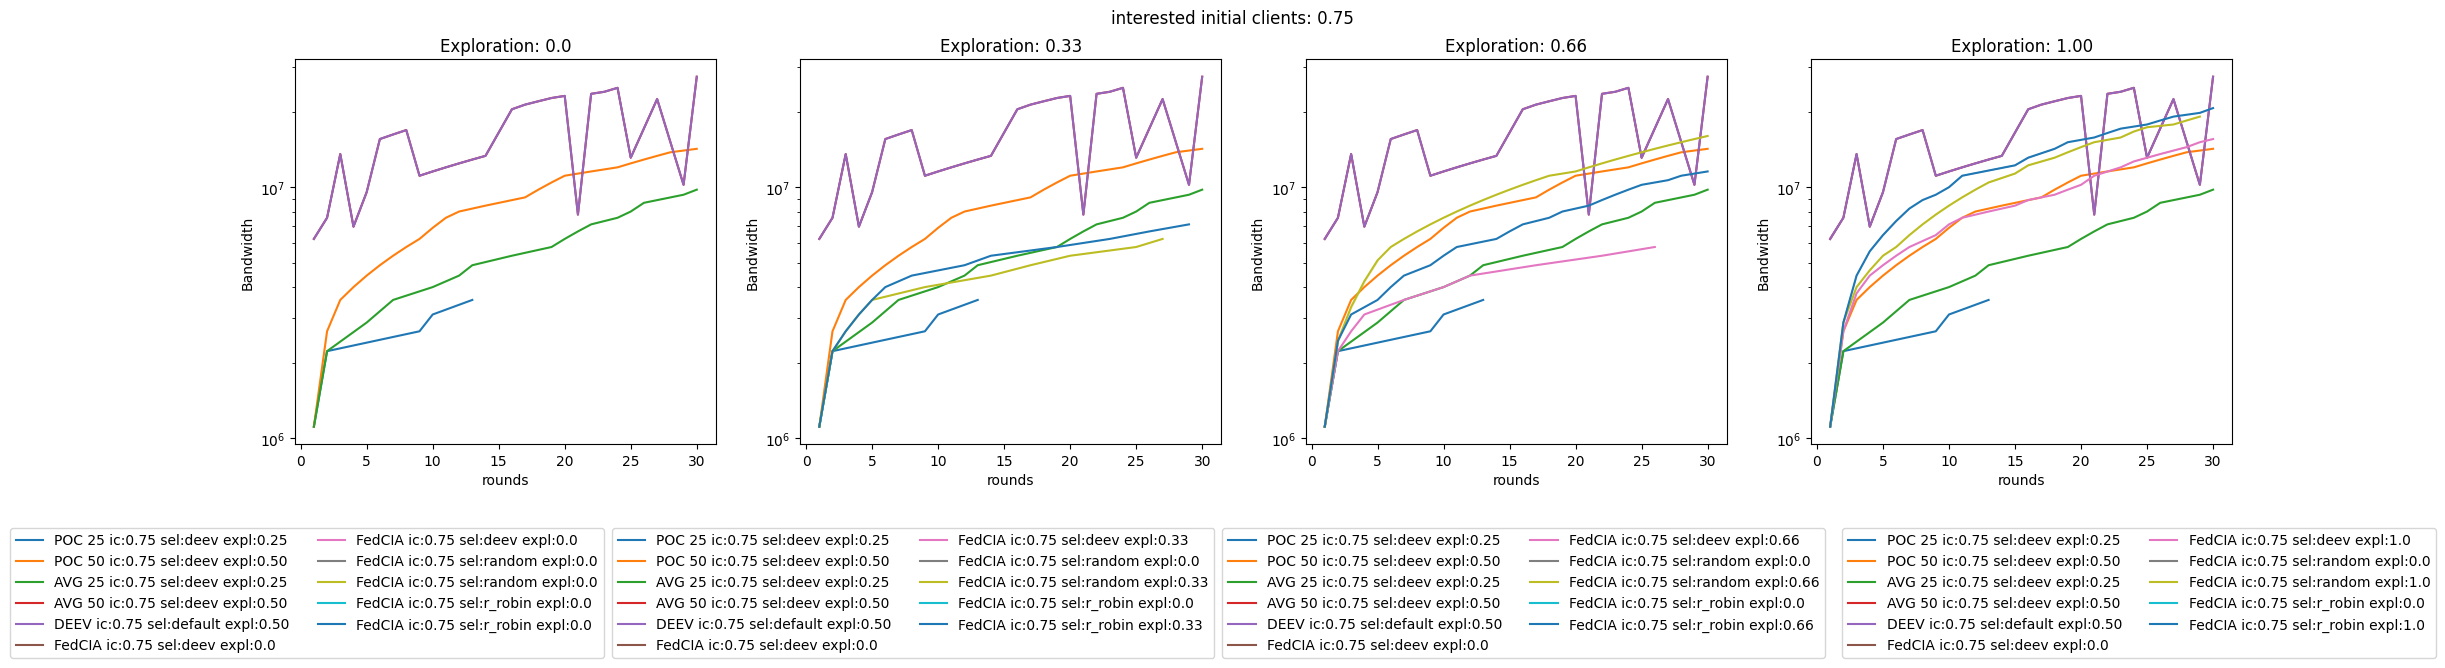

In [106]:
fig_1, ax_acc = plt.subplots(1,4, figsize=(25,5))
fig_2, ax_bw = plt.subplots(1,4, figsize=(25,5))
fig_1.suptitle("interested initial clients: 0.75")
fig_2.suptitle("interested initial clients: 0.75")
for conf in the_configs:
    filtered_data = filter_dataframe(client_data, conf)
    # print(conf.getfloat('exploration'))
    if conf.getfloat('exploration') == 0.00:
        sns.lineplot(ax=ax_acc[0], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[0], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    if conf.getfloat('exploration') == 0.33:
        sns.lineplot(ax=ax_acc[1], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[1], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    elif conf.getfloat('exploration') == 0.66:
        sns.lineplot(ax=ax_acc[2], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[2], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    elif conf.getfloat('exploration') == 1.00:
        sns.lineplot(ax=ax_acc[3], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[3], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
    else:
        sns.lineplot(ax=ax_acc[0], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        sns.lineplot(ax=ax_acc[1], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        sns.lineplot(ax=ax_acc[2], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        sns.lineplot(ax=ax_acc[3], x='rounds', y='g_eval_acc', data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        filtered_data = filtered_data.loc[(filtered_data['is_selected'] == True ) & (filtered_data['old_dynamic_engagement'] == False)]
        sns.lineplot(ax=ax_bw[0], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        sns.lineplot(ax=ax_bw[1], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        sns.lineplot(ax=ax_bw[2], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))
        sns.lineplot(ax=ax_bw[3], x='rounds', y=filtered_data['size'].cumsum(), data=filtered_data, label=f'{conf.name}', errorbar=('ci', False))

ax_acc[0].set_title("Exploration: 0.0")
ax_acc[0].legend(bbox_to_anchor=(0.75,-0.2), ncol=2)
ax_acc[0].set_ylim(0,1)
ax_acc[1].set_title("Exploration: 0.33")
ax_acc[1].legend(bbox_to_anchor=(1, -0.2), ncol=2)
ax_acc[1].set_ylim(0,1)
ax_acc[2].legend(bbox_to_anchor=(1.25, -0.2), ncol=2)
ax_acc[2].set_title("Exploration: 0.66")
ax_acc[2].set_ylim(0,1)

ax_acc[3].legend(bbox_to_anchor=(1.50, -0.2), ncol=2)
ax_acc[3].set_title("Exploration: 1.0")
ax_acc[3].set_ylim(0,1)

ax_bw[0].set_title("Exploration: 0.0")
ax_bw[0].legend(bbox_to_anchor=(0.75,-0.2), ncol=2)
ax_bw[1].set_title("Exploration: 0.33")
ax_bw[1].legend(bbox_to_anchor=(1., -0.2), ncol=2)
ax_bw[2].set_title("Exploration: 0.66")
ax_bw[2].legend(bbox_to_anchor=(1.25, -0.2), ncol=2)
ax_bw[3].set_title("Exploration: 1.00")
ax_bw[3].legend(bbox_to_anchor=(1.50, -0.2), ncol=2)
ax_bw[0].set_ylabel("Bandwidth")
ax_bw[0].set_yscale("log")
ax_bw[1].set_ylabel("Bandwidth")
ax_bw[1].set_yscale("log")
ax_bw[2].set_ylabel("Bandwidth")
ax_bw[2].set_yscale("log")

ax_bw[3].set_ylabel("Bandwidth")
ax_bw[3].set_yscale("log")


## ALL

In [29]:
server_data.head()

,rounds,strategy,model_type,select_client_method,n_selected,n_engaged,n_not_engaged,selection,r_intetion,r_robin,...,local_epochs,dirichlet_alpha,non_iid,dataset,exploitation,exploration,decay,threshold,init_clients,config_test
0,1,cia,dnn,default,50,12,38,"[(36, True), (40, True), (9, True), (3, True),...",0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,...,1,0.1,True,mnist,0.0,0.0,0.005,1.0,0.25,FedCIA ic:0.25 sel:deev expl:0.0
1,2,cia,dnn,default,12,12,38,"[(3, True), (8, True), (9, True), (15, True), ...",0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,...,1,0.1,True,mnist,0.0,0.0,0.005,1.0,0.25,FedCIA ic:0.25 sel:deev expl:0.0
2,3,cia,dnn,default,12,12,38,"[(3, True), (8, True), (9, True), (15, True), ...",0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,...,1,0.1,True,mnist,0.0,0.0,0.005,1.0,0.25,FedCIA ic:0.25 sel:deev expl:0.0
3,4,cia,dnn,default,12,12,38,"[(3, True), (8, True), (9, True), (15, True), ...",0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,...,1,0.1,True,mnist,0.0,0.0,0.005,1.0,0.25,FedCIA ic:0.25 sel:deev expl:0.0
4,5,cia,dnn,default,12,12,38,"[(3, True), (8, True), (9, True), (15, True), ...",0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|...,...,1,0.1,True,mnist,0.0,0.0,0.005,1.0,0.25,FedCIA ic:0.25 sel:deev expl:0.0


In [107]:
df = server_data[(server_data['strategy'] == 'cia') & (server_data['select_client_method'] == 'default_1')]
df_l = server_data[~(server_data['strategy'] == 'cia')]
df_l['_key'] = 1
df_l = df_l.drop('exploration', axis=1)
df_l.head()

/tmp/ipykernel_1872792/2944588507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_l['_key'] = 1


,rounds,strategy,model_type,select_client_method,n_selected,n_engaged,n_not_engaged,selection,r_intetion,r_robin,...,local_epochs,dirichlet_alpha,non_iid,dataset,exploitation,decay,threshold,init_clients,config_test,_key
3600,1,deev,dnn,NaN,50,37,13,"[(0, False), (1, True), (2, True), (3, True), ...",NaN,NaN,...,1,0.1,True,mnist,NaN,0.005,1.0,0.25,DEEV ic:0.25 sel:default expl:0.50,1
3601,2,deev,dnn,NaN,17,37,13,"[(47, True), (20, True), (23, True), (35, True...",NaN,NaN,...,1,0.1,True,mnist,NaN,0.005,1.0,0.25,DEEV ic:0.25 sel:default expl:0.50,1
3602,3,deev,dnn,NaN,16,41,9,"[(47, True), (20, True), (10, True), (35, True...",NaN,NaN,...,1,0.1,True,mnist,NaN,0.005,1.0,0.25,DEEV ic:0.25 sel:default expl:0.50,1
3603,4,deev,dnn,NaN,13,41,9,"[(47, True), (20, True), (28, True), (35, True...",NaN,NaN,...,1,0.1,True,mnist,NaN,0.005,1.0,0.25,DEEV ic:0.25 sel:default expl:0.50,1
3604,5,deev,dnn,NaN,15,41,9,"[(20, True), (47, True), (28, True), (23, True...",NaN,NaN,...,1,0.1,True,mnist,NaN,0.005,1.0,0.25,DEEV ic:0.25 sel:default expl:0.50,1


In [108]:
unique_configs = pd.DataFrame(df['exploration'].unique(),columns=['exploration'])
unique_configs
unique_configs['_key'] = 1
df_m = pd.merge(unique_configs, df_l, left_on='_key', right_on='_key').drop('_key',axis=1)
df_m[['exploration', 'init_clients']]
df_g = pd.concat([df,df_m])


In [109]:
df_g['config_test'].unique()

array(['FedCIA ic:0.25 sel:random expl:0.0',
       'FedCIA ic:0.25 sel:random expl:0.33',
       'FedCIA ic:0.25 sel:random expl:0.66',
       'FedCIA ic:0.25 sel:random expl:1.0',
       'FedCIA ic:0.50 sel:random expl:0.0',
       'FedCIA ic:0.50 sel:random expl:0.33',
       'FedCIA ic:0.50 sel:random expl:0.66',
       'FedCIA ic:0.50 sel:random expl:1.0',
       'FedCIA ic:0.75 sel:random expl:0.0',
       'FedCIA ic:0.75 sel:random expl:0.33',
       'FedCIA ic:0.75 sel:random expl:0.66',
       'FedCIA ic:0.75 sel:random expl:1.0', 'FedCIA TESTE ALLAN 2',
       'DEEV ic:0.25 sel:default expl:0.50',
       'DEEV ic:0.50 sel:default expl:0.50',
       'DEEV ic:0.75 sel:default expl:0.50',
       'POC 33 ic:0.25 sel:deev expl:0.33',
       'AVG 25 ic:0.25 sel:deev expl:0.33',
       'POC 66 ic:0.25 sel:deev expl:0.66',
       'AVG 66 ic:0.25 sel:deev expl:0.66',
       'POC 33 ic:0.50 sel:deev expl:0.33',
       'AVG 25 ic:0.50 sel:deev expl:0.33',
       'POC 66 ic:0.50 sel:deev

In [110]:
def get_dfs():
    mapping1 = {
        'POC 33 ic:0.25 sel:deev expl:0.33': "POC k=33%",
        'POC 66 ic:0.25 sel:deev expl:0.66': "POC k=66%",
        'AVG 33 ic:0.25 sel:deev expl:0.33': "FedAVG k=33%",
        'AVG 66 ic:0.25 sel:deev expl:0.66': "FedAVG k=66%",
        'POC 33 ic:0.50 sel:deev expl:0.33': "POC k=33%",
        'POC 66 ic:0.50 sel:deev expl:0.66': "POC k=66%",
        'AVG 33 ic:0.50 sel:deev expl:0.33': "FedAVG k=33%",
        'AVG 66 ic:0.50 sel:deev expl:0.66': "FedAVG k=66%",
        'POC 33 ic:0.75 sel:deev expl:0.33': "POC k=33%",
        'POC 66 ic:0.75 sel:deev expl:0.66': "POC k=66%",
        'AVG 33 ic:0.75 sel:deev expl:0.33': "FedAVG k=33%",
        'AVG 66 ic:0.75 sel:deev expl:0.66': "FedAVG k=66%",
        'DEEV ic:0.25 sel:default expl:0.50': "DEEV",
        'DEEV ic:0.50 sel:default expl:0.50': "DEEV",
        'DEEV ic:0.75 sel:default expl:0.50': "DEEV",
        'FedCIA ic:0.25 sel:random expl:0.0': "FedCIA Random",
        'FedCIA ic:0.25 sel:random expl:0.33': "FedCIA Random",
        'FedCIA ic:0.25 sel:random expl:0.66': "FedCIA Random",
        'FedCIA ic:0.25 sel:random expl:1.0': "FedCIA Random",
        'FedCIA ic:0.50 sel:random expl:0.0': "FedCIA Random",
        'FedCIA ic:0.50 sel:random expl:0.33': "FedCIA Random",
        'FedCIA ic:0.50 sel:random expl:0.66': "FedCIA Random",
        'FedCIA ic:0.50 sel:random expl:1.0': "FedCIA Random",
        'FedCIA ic:0.75 sel:random expl:0.0': "FedCIA Random",
        'FedCIA ic:0.75 sel:random expl:0.33': "FedCIA Random",
        'FedCIA ic:0.75 sel:random expl:0.66': "FedCIA Random",
        'FedCIA ic:0.75 sel:random expl:1.0': "FedCIA Random", 
    }
    df_0_0 = df_g.loc[df_g['exploration'] == 0.0].copy()
    df_0_0['config_test'] = df_0_0['config_test'].map(mapping1)
    df_0_33 = df_g.loc[df_g['exploration'] == 0.33].copy()
    df_0_33['config_test'] = df_0_33['config_test'].map(mapping1)
    df_0_66 = df_g.loc[df_g['exploration'] == 0.66].copy()
    df_0_66['config_test'] = df_0_66['config_test'].map(mapping1)
    df_0_1_0 = df_g.loc[df_g['exploration'] == 1.0].copy()
    df_0_1_0['config_test'] = df_0_1_0['config_test'].map(mapping1)
    return df_0_0, df_0_33,df_0_66,df_0_1_0

def my_plot(axes, df_list):
    for i, ax in enumerate(axes.flatten()):
        sns.boxplot(ax=ax,data=df_list[i], x='config_test', y='n_engaged', hue='init_clients')
        ax.get_legend().remove()
        ax.set_xticklabels(axes[0].get_xticklabels(), rotation=45)
        ax.set_xlabel("")


ValueError: cannot reindex on an axis with duplicate labels

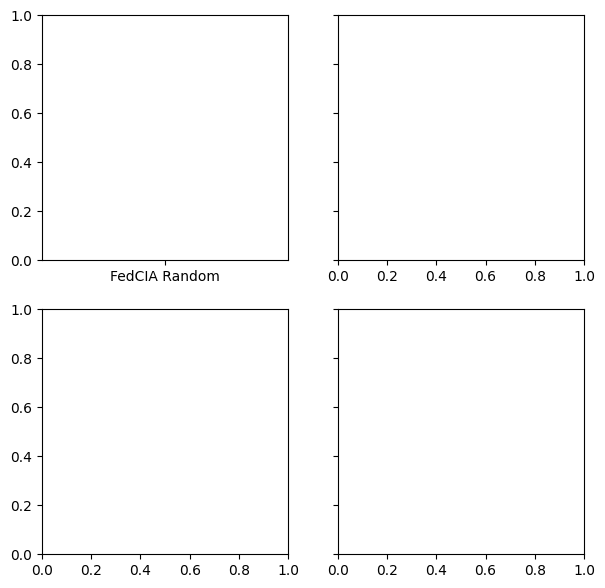

In [111]:
fig, axes = plt.subplots(2, 2, figsize=(7,7), sharey=True)

my_plot(axes.flatten(), get_dfs())
axes[0][0].set_ylabel("Client engaged")
axes[1][0].set_ylabel("Client engaged")
fig.subplots_adjust(hspace=0, wspace=0)
handles, labels = axes[0][0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0,0,0.7,0.96), ncol=3, title="% Initial clients")


In [ ]:
data = {
    'config_test': [],
    'min_value':[],
    'max_value': [],
    'avg_value': [],
    'exploration': [],
    'init_clients': [],
    'method': [],
    'substrategy': [],
}
for (group_name, group_data) in server_data.groupby('config_test'):
    min_value = group_data['n_engaged'].min()
    max_value = group_data['n_engaged'].max()
    avg_value = group_data['n_engaged'].median()
    exploration = group_data['exploration'].sample(1).iloc[0]
    init_clients = group_data['init_clients'].sample(1).iloc[0]
    method = group_data['strategy'].sample(1).iloc[0]
    substrategy = group_data['select_client_method'].sample(1).iloc[0]
    data['config_test'].append(group_name)
    data['method'].append(method)
    data['min_value'].append(min_value)
    data['max_value'].append(max_value)
    data['avg_value'].append(avg_value)
    data['exploration'].append(exploration)
    data['init_clients'].append(init_clients)
    data['substrategy'].append(substrategy)
engaged_table = pd.DataFrame(data)

In [ ]:
engaged_table.head()

,config_test,min_value,max_value,avg_value,exploration,init_clients,method,substrategy
0,AVG 25 ic:0.25 sel:deev expl:0.25,12,49,44.0,0.25,0.25,avg,random
1,AVG 25 ic:0.50 sel:deev expl:0.25,25,49,46.0,0.25,0.50,avg,random
2,AVG 25 ic:0.75 sel:deev expl:0.25,37,50,48.0,0.25,0.75,avg,random
3,AVG 50 ic:0.25 sel:deev expl:0.50,12,49,44.0,0.50,0.25,avg,random
4,AVG 50 ic:0.50 sel:deev expl:0.50,25,50,46.0,0.50,0.50,avg,random


In [ ]:
literature_engaged = engaged_table.loc[~(engaged_table['method'] == 'cia')]
literature_engaged

,config_test,min_value,max_value,avg_value,exploration,init_clients,method,substrategy
0,AVG 25 ic:0.25 sel:deev expl:0.25,12,49,44.0,0.25,0.25,avg,random
1,AVG 25 ic:0.50 sel:deev expl:0.25,25,49,46.0,0.25,0.50,avg,random
2,AVG 25 ic:0.75 sel:deev expl:0.25,37,50,48.0,0.25,0.75,avg,random
3,AVG 50 ic:0.25 sel:deev expl:0.50,12,49,44.0,0.50,0.25,avg,random
4,AVG 50 ic:0.50 sel:deev expl:0.50,25,50,46.0,0.50,0.50,avg,random
5,AVG 50 ic:0.75 sel:deev expl:0.50,37,50,48.0,0.50,0.75,avg,random
6,DEEV ic:0.25 sel:default expl:0.50,37,41,40.0,NaN,0.25,deev,NaN
7,DEEV ic:0.50 sel:default expl:0.50,37,39,39.0,NaN,0.50,deev,NaN
8,DEEV ic:0.75 sel:default expl:0.50,37,40,40.0,NaN,0.75,deev,NaN
45,POC 25 ic:0.25 sel:deev expl:0.25,12,29,24.0,0.25,0.25,poc,NaN


In [ ]:
cia_engaged = engaged_table.loc[(engaged_table['method'] == 'cia') & ( engaged_table['substrategy'] == 'default')]
cia_engaged.head()

,config_test,min_value,max_value,avg_value,exploration,init_clients,method,substrategy
9,FedCIA ic:0.25 sel:deev expl:0.0,12,12,12.0,0.00,0.25,cia,default
10,FedCIA ic:0.25 sel:deev expl:0.33,12,25,17.0,0.33,0.25,cia,default
11,FedCIA ic:0.25 sel:deev expl:0.66,12,30,21.0,0.66,0.25,cia,default
12,FedCIA ic:0.25 sel:deev expl:1.0,12,37,31.5,1.00,0.25,cia,default
21,FedCIA ic:0.50 sel:deev expl:0.0,25,25,25.0,0.00,0.50,cia,default


In [ ]:
def my_boxplot(ax, df_list, ic):
    df_literature = literature_engaged.loc[literature_engaged['init_clients'] == ic]
    for i, df in enumerate(df_list):
        df = pd.concat([df,df_literature])
        unique_configs = df['config_test'].unique()
        palette = sns.color_palette("hls", len(unique_configs))
        color_dict = {config: color for config, color in zip(unique_configs, palette)}
        df_melted = df.melt(value_vars=['min_value', 'max_value', 'avg_value'], id_vars='config_test', var_name='Statistic', value_name='Value')
        sns.boxplot(ax=ax[i], data=df_melted, y='Value', hue='config_test', palette=color_dict)
        # Rotacionando os rótulos do eixo x
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
        
        legend = ax[i].get_legend()
        if legend:
            legend.remove()

def my_boxplot_only_cia(ax, df_list):
    for i, df in enumerate(df_list):
        unique_configs = df['config_test'].unique()
        palette = sns.color_palette("hls", len(unique_configs))
        color_dict = {config: color for config, color in zip(unique_configs, palette)}
        df_melted = df.melt(value_vars=['min_value', 'max_value', 'avg_value'], id_vars='config_test', var_name='Statistic', value_name='Value')
        sns.boxplot(ax=ax[i], data=df_melted, y='Value', hue='config_test', palette=color_dict)
        # Rotacionando os rótulos do eixo x
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
        
        legend = ax[i].get_legend()
        if legend:
            legend.remove()

In [ ]:
df_0_25 = cia_engaged.loc[(cia_engaged['init_clients'] == 0.75)]
# df_0_25_0_0 = df_0_25.loc[df_0_25['exploration'] == 0.00]
df_0_25_0_33 = df_0_25.loc[df_0_25['exploration'] == 0.33]
df_0_25_0_66 = df_0_25.loc[df_0_25['exploration'] == 0.66]
df_0_25_1_00 = df_0_25.loc[df_0_25['exploration'] == 1.00]

/tmp/ipykernel_3445395/2221162124.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_3445395/2221162124.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_3445395/2221162124.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


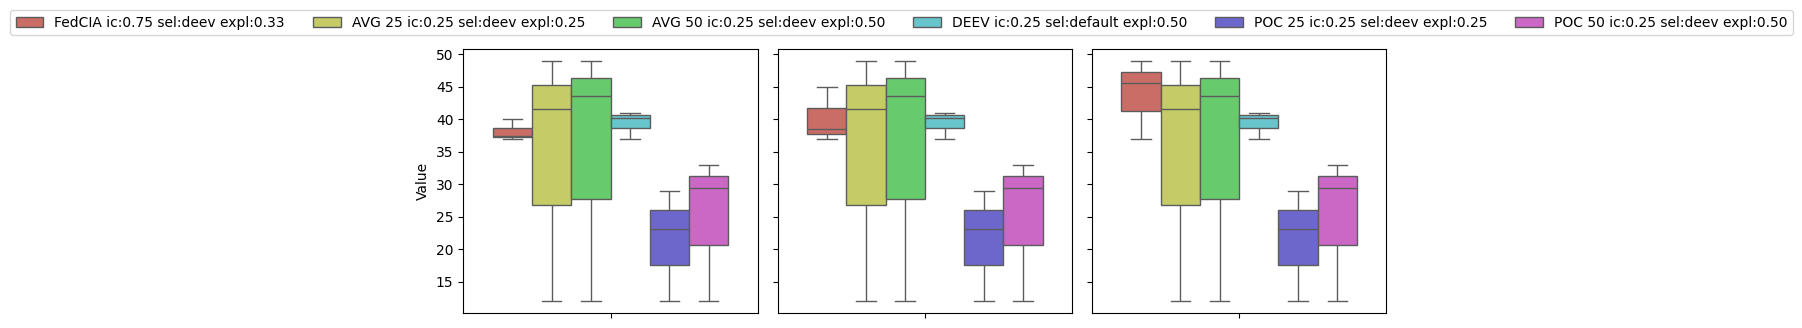

In [ ]:
fig_0_25, ax_0_25 = plt.subplots(1,3, figsize=(10,3), sharey=True)
fig_0_25.savefig('0.25.png', format='png', dpi=300)
my_boxplot(ax_0_25, [
    # df_0_25_0_0,
    df_0_25_0_33,
    df_0_25_0_66,
    df_0_25_1_00,
], 0.25)
handles, labels = ax_0_25[0].get_legend_handles_labels()
fig_0_25.subplots_adjust(hspace=0, wspace = 0)
fig_0_25.legend(handles, labels, loc='upper center', ncol = 6, bbox_to_anchor=((0.0, 0., 1., 1.1)))
fig_0_25.tight_layout()
fig_0_25.show()

In [ ]:
def plot_diff_engaged(ax, key):
    df_grouped = df.groupby('')
    min_value = df_grouped['n_engaged'].min()
    max_value = df_grouped['n_engaged'].max()
    avg_value = df_grouped['n_engaged'].mean()
    return min_value, avg_value, max_value
    

## ONLY CIA

In [250]:
# select_but_not_engaged = data[(data['is_selected'] == True)]
select_but_not_engaged = data[
    (data['rounds'] > 1) &
    (data['is_selected'] == True) &
    (data['old_dynamic_engagement'] == False)
]
# select_but_not_engaged = data[(data['is_selected'] == True) & (data['select_client_method'] == METHOD)]
select_but_not_engaged = select_but_not_engaged.loc[]
g_select_but_not_engaged = select_but_not_engaged.groupby(['init_clients', 'exploration', 'config_test']).agg({'is_selected': 'count'}).reset_index()
# g_select_but_not_engaged['is_selected'] = (g_select_but_not_engaged['is_selected'] * SIZE_MODEL)/1048576
g_select_but_not_engaged

,init_clients,exploration,config_test,is_selected
0,0.25,0.1,FedCIA TESTE rafael deev,219
1,0.25,0.1,FedCIA TESTE rafael r_robin,140
2,0.25,0.1,FedCIA TESTE rafael random,157


In [256]:
select_but_not_engaged_literature = data_literature[
    (data_literature['rounds'] > 1) &
    (data_literature['is_selected'] == True) &
    (data_literature['old_dynamic_engagement'] == False)
]
# select_but_not_engaged_literature = data_literature[(data_literature['is_selected'] == True) & (data_literature['old_dynamic_engagement'] == False)]
g_select_but_not_engaged_literature = select_but_not_engaged_literature.groupby(['init_clients', 'exploration', 'config_test']).agg({'is_selected': 'count'}).reset_index()
# g_select_but_not_engaged_literature['is_selected'] = (g_select_but_not_engaged_literature['is_selected'] * SIZE_MODEL)/1048576
g_select_but_not_engaged_literature

,init_clients,exploration,config_test,is_selected
0,0.25,0.33,AVG 25 ic:0.25 sel:deev expl:0.33,70
1,0.25,0.33,POC 33 ic:0.25 sel:deev expl:0.33,43
2,0.25,0.50,DEEV ic:0.25 sel:default expl:0.50,11
3,0.25,0.66,AVG 66 ic:0.25 sel:deev expl:0.66,135
4,0.25,0.66,POC 66 ic:0.25 sel:deev expl:0.66,100
5,0.50,0.33,AVG 25 ic:0.50 sel:deev expl:0.33,77
6,0.50,0.33,POC 33 ic:0.50 sel:deev expl:0.33,4
7,0.50,0.50,DEEV ic:0.50 sel:default expl:0.50,7
8,0.50,0.66,AVG 66 ic:0.50 sel:deev expl:0.66,142
9,0.50,0.66,POC 66 ic:0.50 sel:deev expl:0.66,97


In [252]:
data_0_25 = g_select_but_not_engaged.loc[g_select_but_not_engaged['init_clients'] == 0.25]
# df_0_25_0_0 = data_0_25.loc[data_0_25['exploration'] == 0.01]
# df_0_25_0_0
# df_0_25_0_33 = data_0_25.loc[data_0_25['exploration'] == 0.33]
# df_0_25_0_66 = data_0_25.loc[data_0_25['exploration'] == 0.66]
# df_0_25_1_00 = data_0_25.loc[data_0_25['exploration'] == 1.00]
data_0_25

,init_clients,exploration,config_test,is_selected
0,0.25,0.1,FedCIA TESTE rafael deev,219
1,0.25,0.1,FedCIA TESTE rafael r_robin,140
2,0.25,0.1,FedCIA TESTE rafael random,157


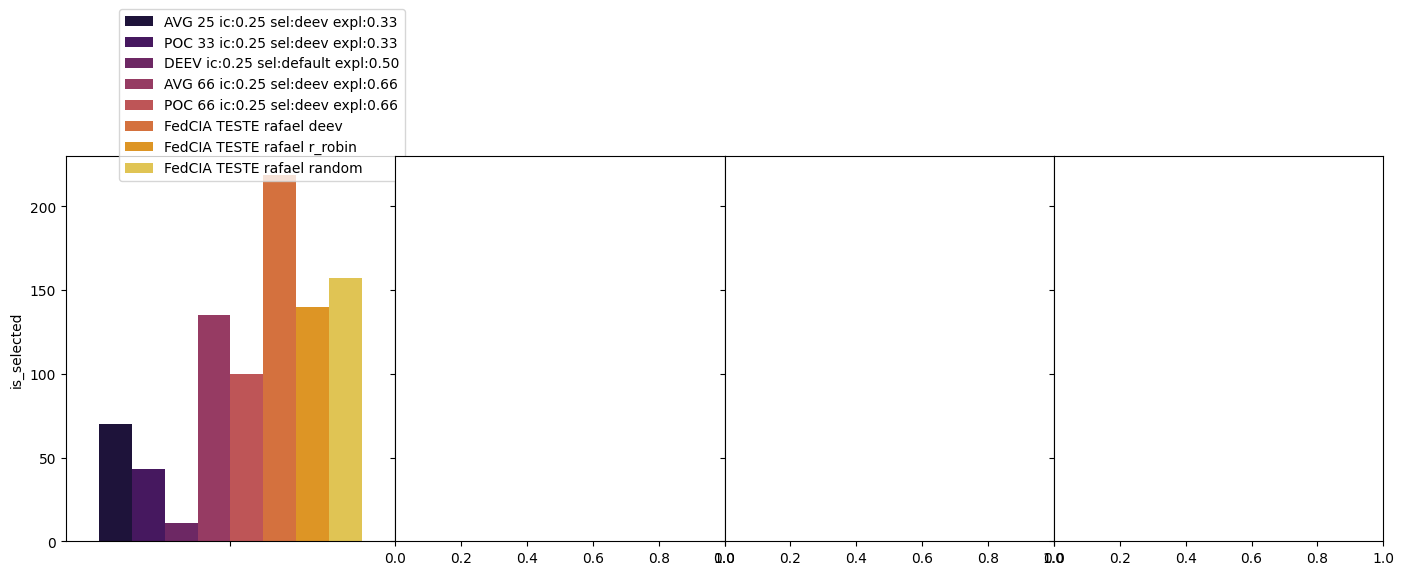

In [254]:
fig_0_25, ax_0_25 = plt.subplots(1,4, figsize=(17,5), sharey=True)
# plot_bw([df_0_25_0_0, df_0_25_0_33, df_0_25_0_66, df_0_25_1_00], ax_0_25, 0.25, g_select_but_not_engaged_literature)
plot_bw([data_0_25], ax_0_25, 0.25, g_select_but_not_engaged_literature)
fig_0_25.savefig('0.25.png', format='png', dpi=300)
fig_0_25.subplots_adjust(hspace=0, wspace=0)
fig_0_25.show()

In [131]:
data_0_50 = g_select_but_not_engaged.loc[g_select_but_not_engaged['init_clients'] == 0.50]
df_0_50_0_0 = data_0_50.loc[data_0_50['exploration'] == 0.00]
df_0_50_0_33 = data_0_50.loc[data_0_50['exploration'] == 0.33]
df_0_50_0_66 = data_0_50.loc[data_0_50['exploration'] == 0.66]
df_0_50_1_00 = data_0_50.loc[data_0_50['exploration'] == 1.00]

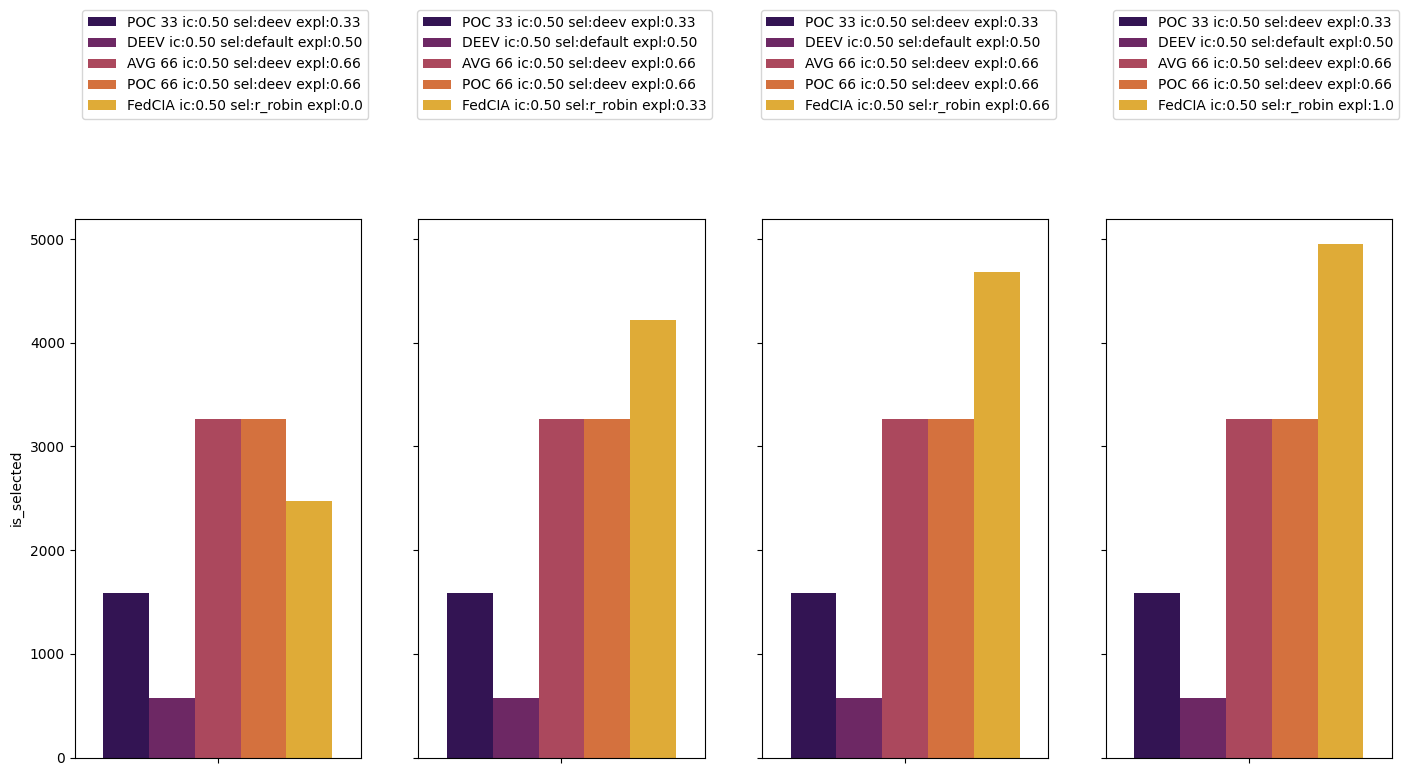

In [132]:
fig_0_50, ax_0_50 = plt.subplots(1,4, figsize=(17,7), sharey=True)
plot_bw([df_0_50_0_0, df_0_50_0_33, df_0_50_0_66, df_0_50_1_00], ax_0_50, 0.50, g_select_but_not_engaged_literature)
fig_0_50.savefig('0.50.png', format='png', dpi=300)
fig_0_50.subplots_adjust(hspace=0)
fig_0_50.show()
#FedCIA ic:0.50 sel:deev expl:0.33
#POC 50 ic:0.50 sel:deev expl:0.50

In [133]:
data_0_75 = g_select_but_not_engaged.loc[g_select_but_not_engaged['init_clients'] == 0.75]
df_0_75_0_0 = data_0_75.loc[data_0_75['exploration'] == 0.00]
df_0_75_0_33 = data_0_75.loc[data_0_75['exploration'] == 0.33]
df_0_75_0_66 = data_0_75.loc[data_0_75['exploration'] == 0.66]
df_0_75_1_00 = data_0_75.loc[data_0_75['exploration'] == 1.00]

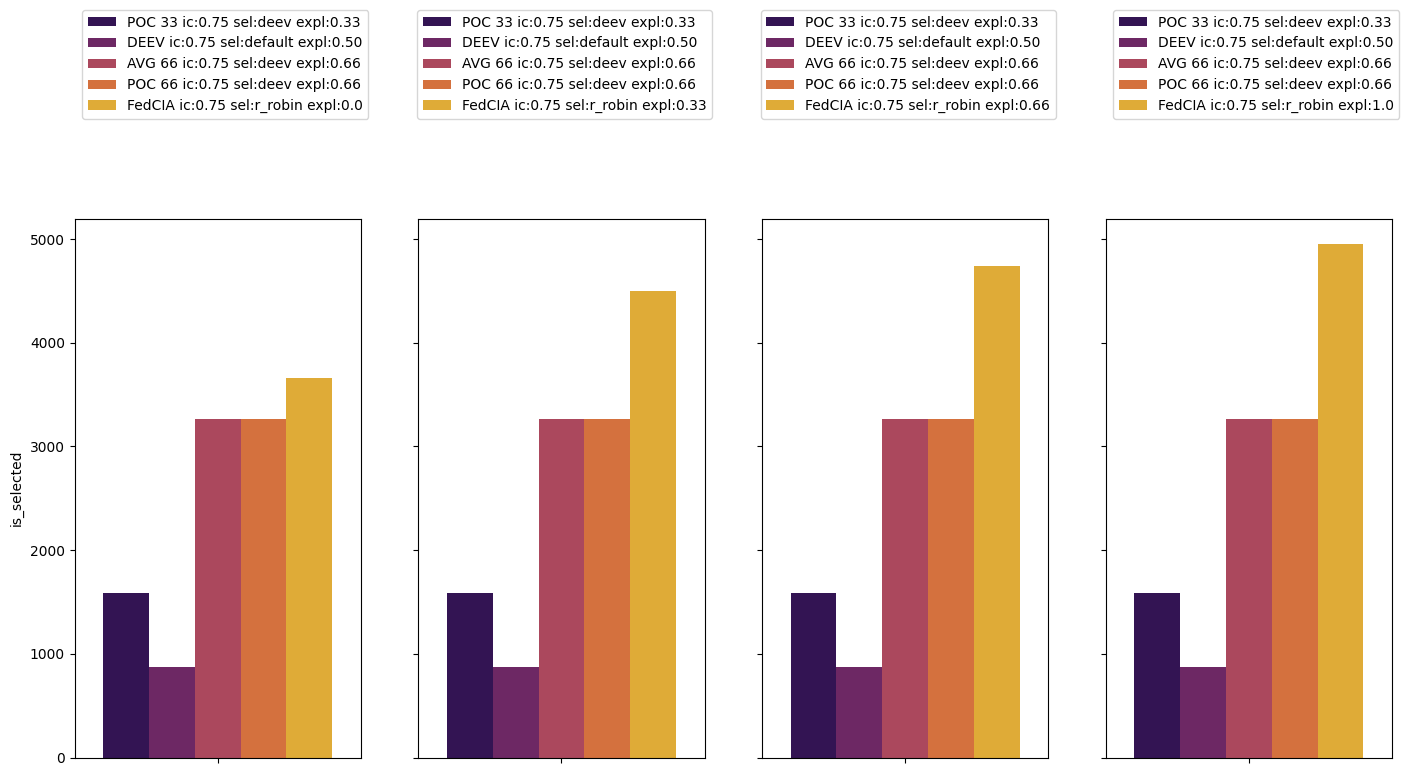

In [134]:
fig_0_75, ax_0_75 = plt.subplots(1,4, figsize=(17,7), sharey=True)
plot_bw([df_0_75_0_0, df_0_75_0_33, df_0_75_0_66, df_0_75_1_00], ax_0_75, 0.75, g_select_but_not_engaged_literature)
fig_0_75.savefig('0.75.png', format='png', dpi=300)
fig_0_75.subplots_adjust(hspace=0)
fig_0_75.show()
#FedCIA ic: 75 sel:deev expl:0.33

## ONLY SOLUTION

In [135]:
# Interested Clients 0.25
data_0_25 = data.loc[(data['init_clients'] == 0.25) & (data['strategy'] == 'cia')]
df_0_25_0_0 = data_0_25.loc[data_0_25['exploration'] == 0.00]
df_0_25_0_33 = data_0_25.loc[data_0_25['exploration'] == 0.33]
df_0_25_0_66 = data_0_25.loc[data_0_25['exploration'] == 0.66]
df_0_25_1_00 = data_0_25.loc[data_0_25['exploration'] == 1.00]

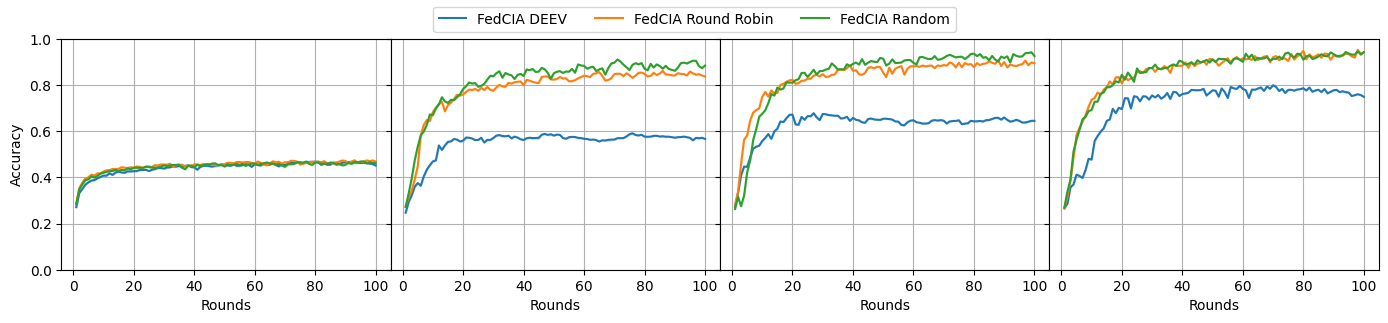

In [136]:
fig_0_25, ax_0_25 = plt.subplots(1,4, figsize=(17,3), sharey=True)
plot_only_cia([df_0_25_0_0, df_0_25_0_33, df_0_25_0_66, df_0_25_1_00], ax_0_25)
fig_0_25.savefig('0.25.png', format='png', dpi=300)
fig_0_25.subplots_adjust(hspace=0, wspace=0)
handles, labels = ax_0_25[0].get_legend_handles_labels()
fig_0_25.legend(handles, labels, loc='upper center', ncol=6)
# fig_0_25.tight_layout()
fig_0_25.show()

In [137]:
# Interested clients 0.5
data_0_50 = data.loc[data['init_clients'] == 0.50]
df_0_50_0_0 = data_0_50.loc[data_0_50['exploration'] == 0.00]
df_0_50_0_33 = data_0_50.loc[data_0_50['exploration'] == 0.33]
df_0_50_0_66 = data_0_50.loc[data_0_50['exploration'] == 0.66]
df_0_50_1_00 = data_0_50.loc[data_0_50['exploration'] == 1.00]


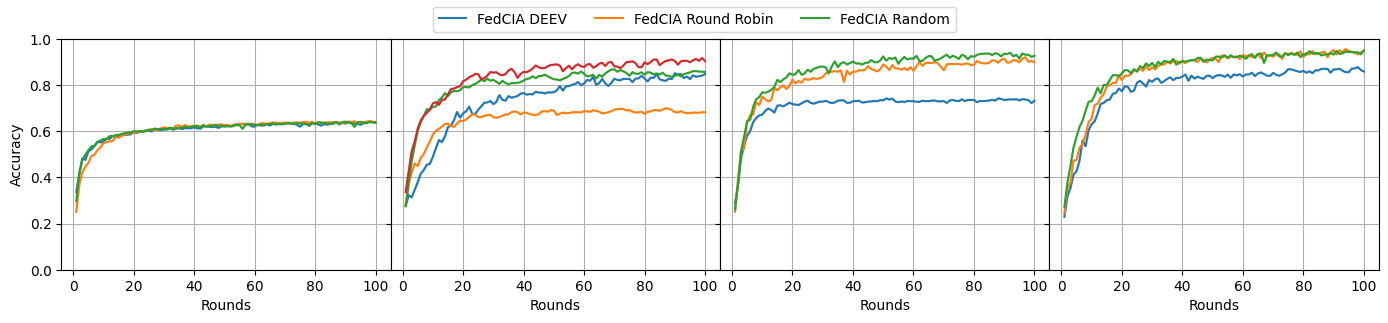

In [138]:
fig_0_50, ax_0_50 = plt.subplots(1,4, figsize=(17,3), sharey=True)
plot_only_cia([df_0_50_0_0, df_0_50_0_33, df_0_50_0_66, df_0_50_1_00], ax_0_50)
fig_0_50.savefig('0.50.png', format='png', dpi=300)
fig_0_50.subplots_adjust(hspace=0, wspace=0)
handles, labels = ax_0_50[0].get_legend_handles_labels()
fig_0_50.legend(handles, labels, loc='upper center', ncol=6)
# fig_0_50.tight_layout()
fig_0_50.show()

In [ ]:
# Interested clients 0.75
data_0_75 = data.loc[data['init_clients'] == 0.75]
df_0_75_0_0 = data_0_75.loc[data_0_75['exploration'] == 0.00]
df_0_75_0_33 = data_0_75.loc[data_0_75['exploration'] == 0.33]
df_0_75_0_66 = data_0_75.loc[data_0_75['exploration'] == 0.66]
df_0_75_1_00 = data_0_75.loc[data_0_75['exploration'] == 1.00]

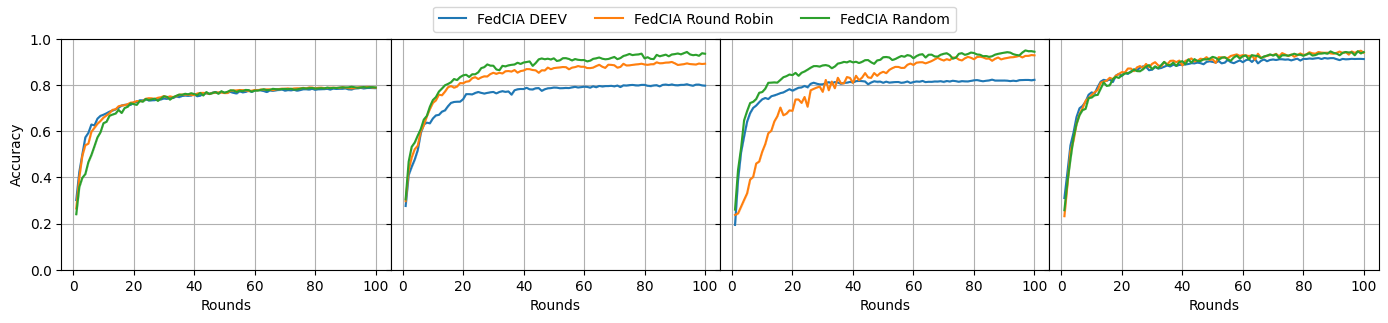

In [ ]:
fig_0_75, ax_0_75 = plt.subplots(1,4, figsize=(17,3), sharey=True)
plot_only_cia([df_0_75_0_0, df_0_75_0_33, df_0_75_0_66, df_0_75_1_00], ax_0_75)
fig_0_75.savefig('0.75.png', format='png', dpi=300)
fig_0_75.subplots_adjust(hspace=0, wspace = 0)
handles, labels = ax_0_75[0].get_legend_handles_labels()
fig_0_75.legend(handles, labels, loc='upper center', ncol = 6)
# fig_0_75.tight_layout()
fig_0_75.show()

In [ ]:
select_but_not_engaged = data[(data['old_dynamic_engagement'] == False) & (data['is_selected'] == True) & (data['strategy'] == 'cia')]
select_but_not_engaged = select_but_not_engaged.loc[select_but_not_engaged['rounds'] > 1]
g_select_but_not_engaged = select_but_not_engaged.groupby(['init_clients', 'exploration', 'config_test']).agg({'is_selected': 'count'}).reset_index()

In [ ]:
data_0_25 = g_select_but_not_engaged.loc[g_select_but_not_engaged['init_clients'] == 0.25]
df_0_25_0_0 = data_0_25.loc[data_0_25['exploration'] == 0.00]
df_0_25_0_33 = data_0_25.loc[data_0_25['exploration'] == 0.33]
df_0_25_0_66 = data_0_25.loc[data_0_25['exploration'] == 0.66]
df_0_25_1_00 = data_0_25.loc[data_0_25['exploration'] == 1.00]

/tmp/ipykernel_3445395/4177883523.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.15))


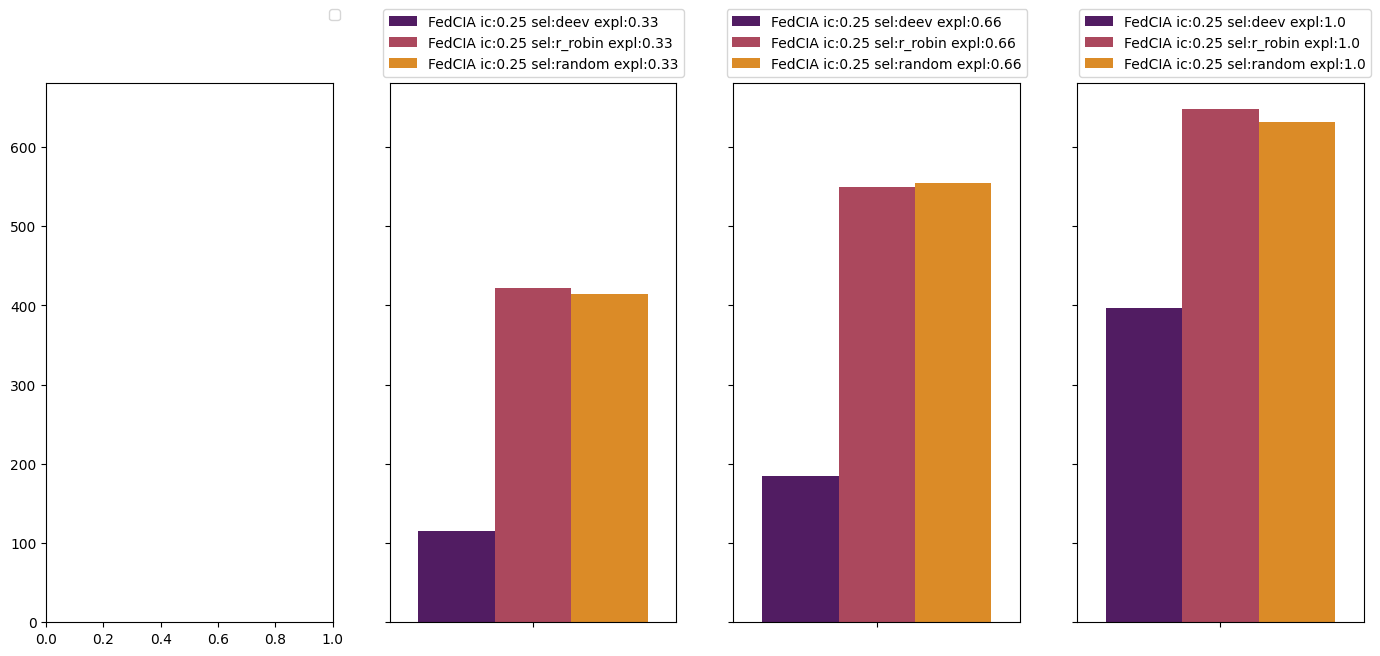

In [ ]:
fig_0_25, ax_0_25 = plt.subplots(1,4, figsize=(17,7), sharey=True)
plot_bw_only_cia([df_0_25_0_0, df_0_25_0_33, df_0_25_0_66, df_0_25_1_00], ax_0_25)
fig_0_25.savefig('0.25.png', format='png', dpi=300)
fig_0_25.subplots_adjust(hspace=0)
fig_0_25.show()

In [ ]:
data_0_50 = g_select_but_not_engaged.loc[g_select_but_not_engaged['init_clients'] == 0.50]
df_0_50_0_0 = data_0_50.loc[data_0_50['exploration'] == 0.00]
df_0_50_0_33 = data_0_50.loc[data_0_50['exploration'] == 0.33]
df_0_50_0_66 = data_0_50.loc[data_0_50['exploration'] == 0.66]
df_0_50_1_00 = data_0_50.loc[data_0_50['exploration'] == 1.00]

/tmp/ipykernel_3445395/4177883523.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.15))


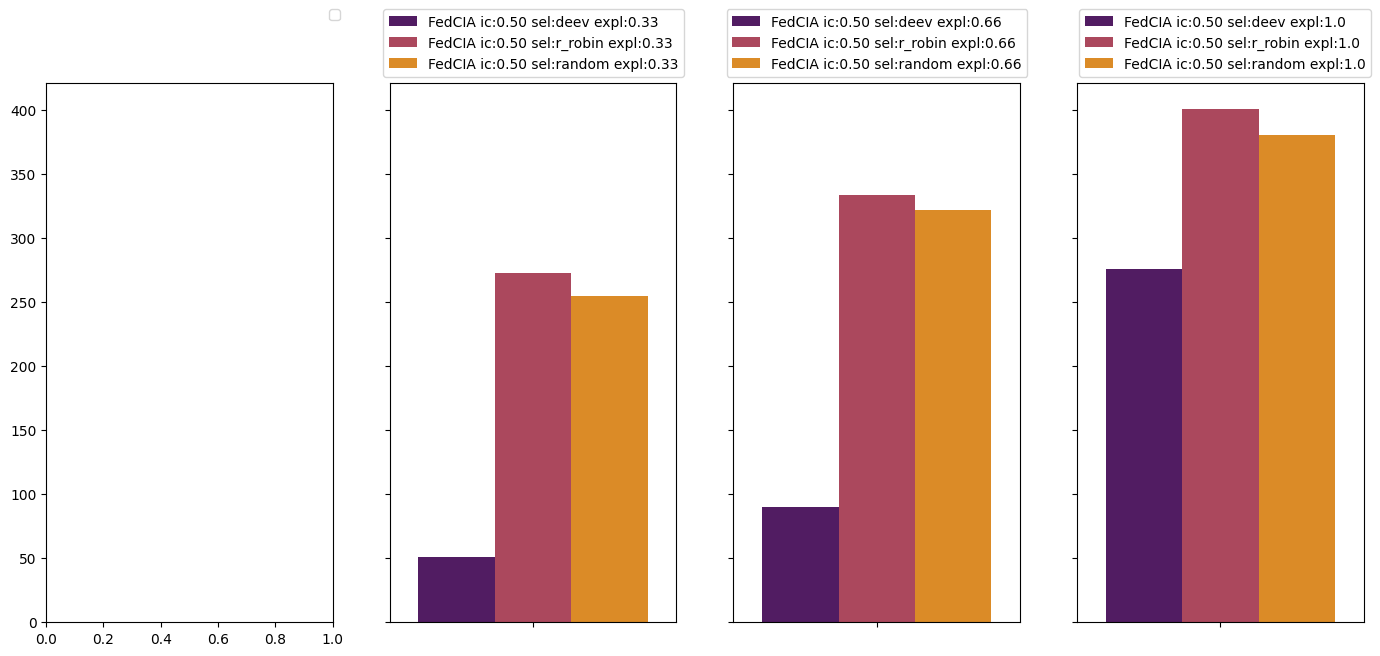

In [ ]:
fig_0_50, ax_0_50 = plt.subplots(1,4, figsize=(17,7), sharey=True)
plot_bw_only_cia([df_0_50_0_0, df_0_50_0_33, df_0_50_0_66, df_0_50_1_00], ax_0_50)
fig_0_50.savefig('0.50.png', format='png', dpi=300)
fig_0_50.subplots_adjust(hspace=0)
fig_0_50.show()

In [ ]:
data_0_75 = g_select_but_not_engaged.loc[g_select_but_not_engaged['init_clients'] == 0.75]
df_0_75_0_0 = data_0_75.loc[data_0_75['exploration'] == 0.00]
df_0_75_0_33 = data_0_75.loc[data_0_75['exploration'] == 0.33]
df_0_75_0_66 = data_0_75.loc[data_0_75['exploration'] == 0.66]
df_0_75_1_00 = data_0_75.loc[data_0_75['exploration'] == 1.00]

/tmp/ipykernel_3445395/4177883523.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend(bbox_to_anchor=(0.0, 0., 1.05, 1.15))


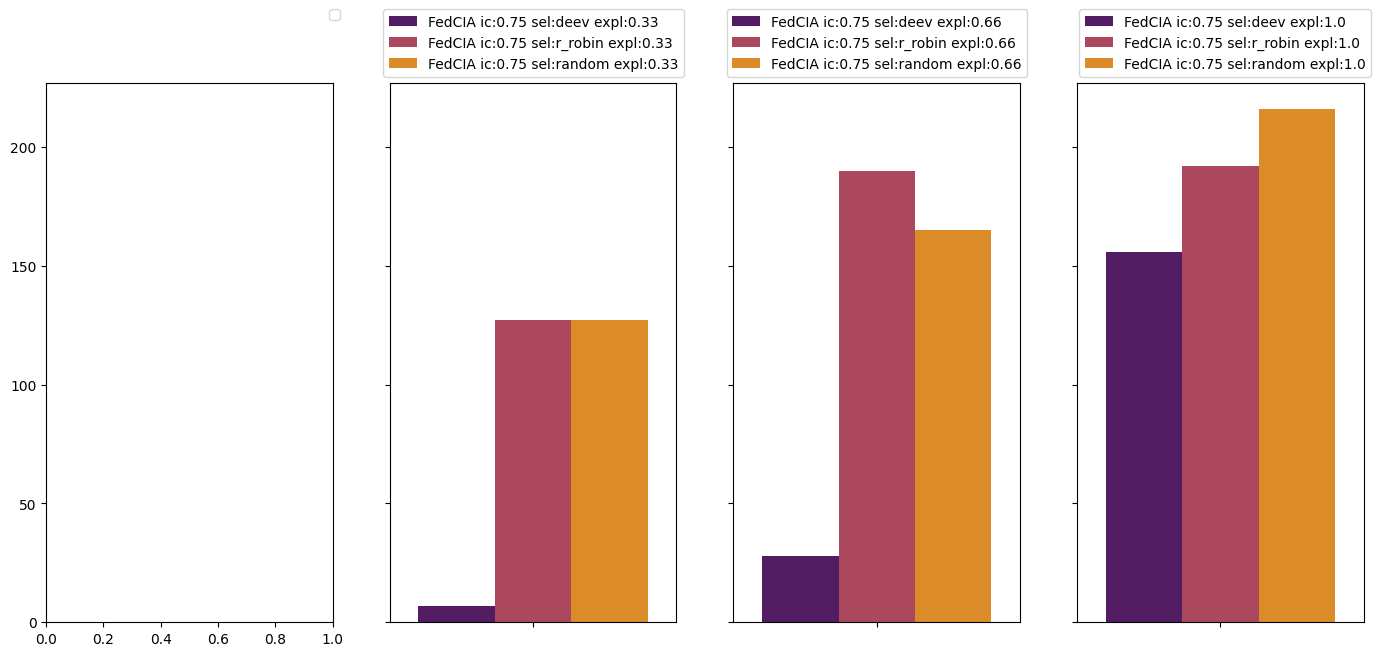

In [ ]:
fig_0_75, ax_0_75 = plt.subplots(1,4, figsize=(17,7), sharey=True)
plot_bw_only_cia([df_0_75_0_0, df_0_75_0_33, df_0_75_0_66, df_0_75_1_00], ax_0_75)
fig_0_75.savefig('0.75.png', format='png', dpi=300)
fig_0_75.subplots_adjust(hspace=0)
fig_0_75.show()